In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
his = pd.read_csv("/content/drive/MyDrive/college/dsw_ml_test/data/historic.csv")

In [ ]:
his

item_no    category       main_promotion   color  stars  \
0      739157       Tunic              Catalog   Green    3.1   
1      591846      Hoodie   Category_Highlight     Red    1.5   
2      337574  Sweatshirt              Catalog     Red    4.4   
3      401933  Polo-Shirt   Category_Highlight    Blue    3.1   
4      812151      Hoodie   Category_Highlight   Green    4.1   
...       ...         ...                  ...     ...    ...   
7995   280947     T-Shirt              Catalog    Blue    3.9   
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5   
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0   
7998   786448      Blouse   Category_Highlight    Blue    2.6   
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9   

     success_indicator  
0                 flop  
1                 flop  
2                  top  
3                 flop  
4                  top  
...                ...  
7995              flop  
7996               top  
7997              flop  
7998              flop  
7999               top  

[8000 rows x 6 columns]

In [ ]:
his.describe()

item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000

In [ ]:
his.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [ ]:
!pip install ydata-profiling -q

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(his, title="Profiling Report")

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:522: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
# Check for missing values
print(his.isnull().sum())

# Count unique values in categorical columns
print(his['category'].nunique())
print(his['main_promotion'].nunique())
print(his['color'].nunique())
print(his['success_indicator'].nunique())

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64
6
4
10
2


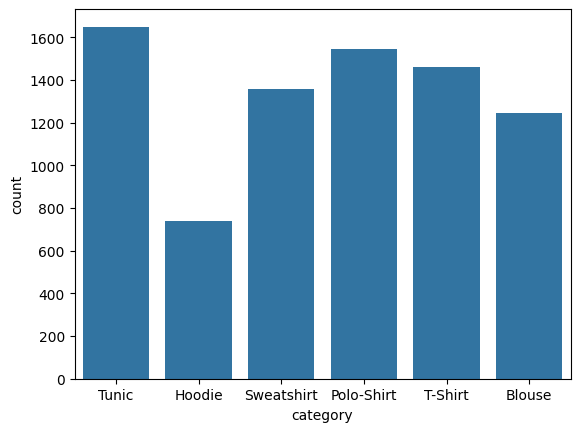

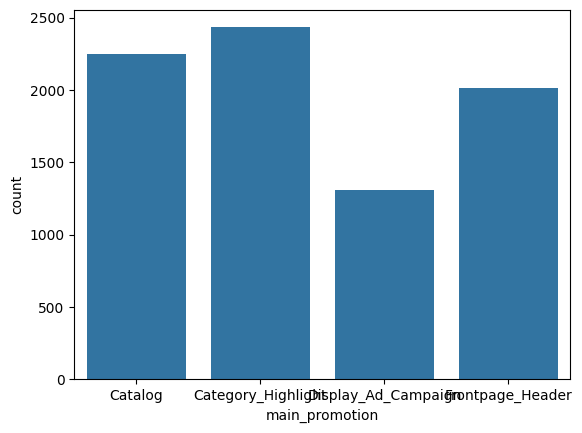

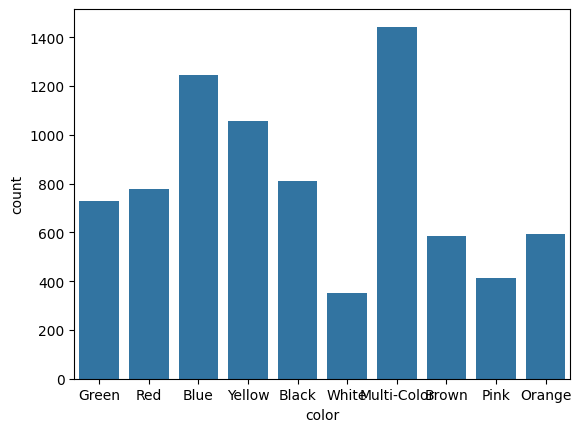

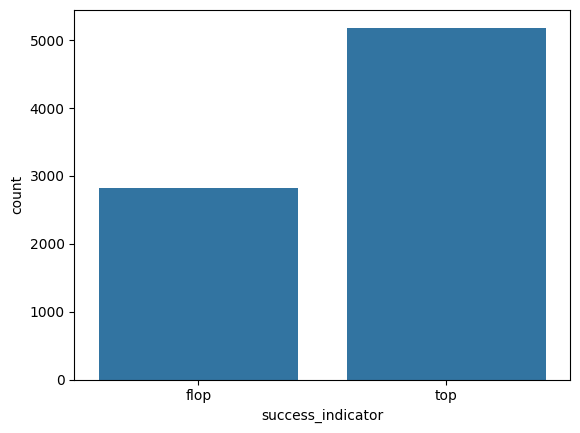

In [70]:
sns.countplot(data=his, x='category')
plt.show()

sns.countplot(data=his, x='main_promotion')
plt.show()

sns.countplot(data=his, x='color')
plt.show()

sns.countplot(data=his, x='success_indicator')
plt.show()


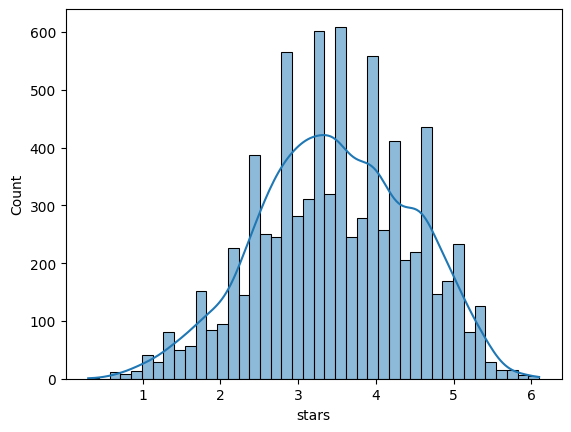

In [71]:
sns.histplot(his['stars'], kde=True)
plt.show()

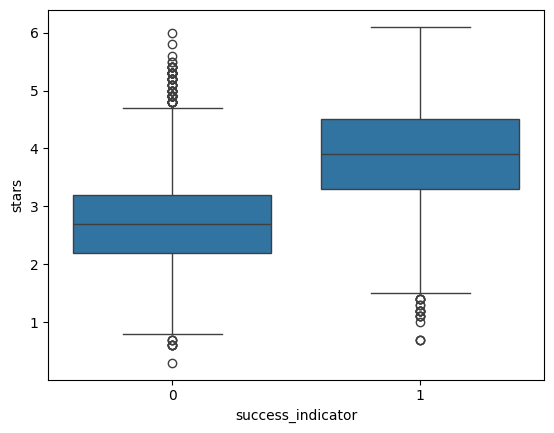

In [72]:
sns.boxplot(x='success_indicator', y='stars', data=df)
plt.show()

based on this we can find out that there are many outliers in flop with respect to start.

In [74]:
his['success_indicator'].describe()

count     8000
unique       2
top        top
freq      5185
Name: success_indicator, dtype: object

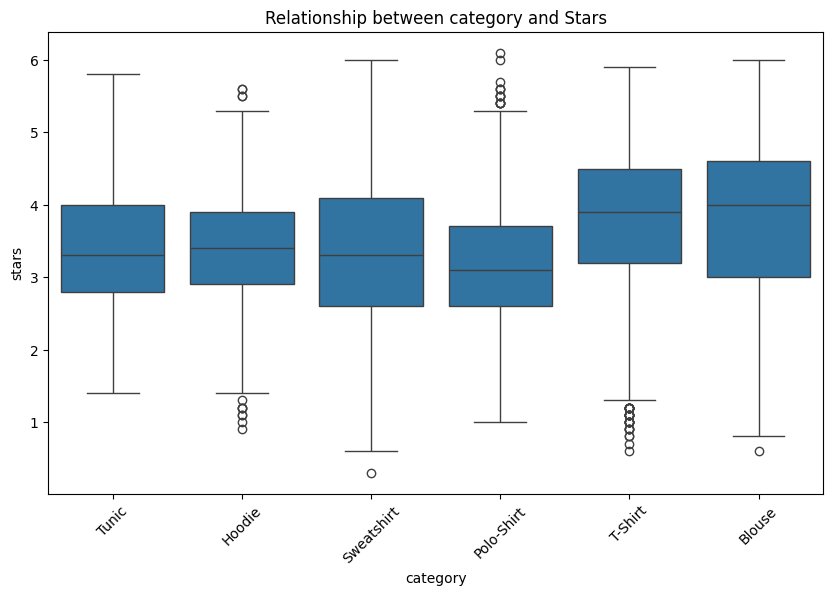

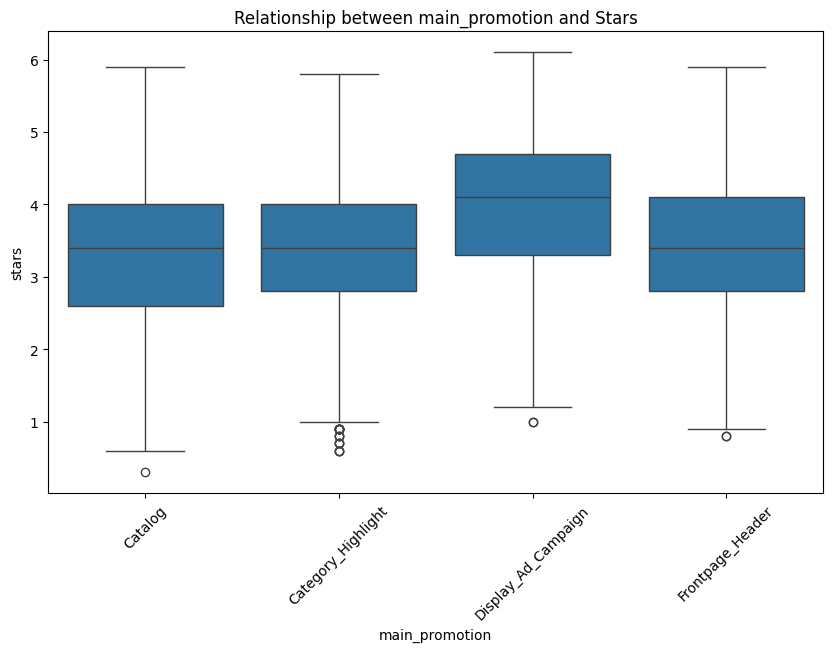

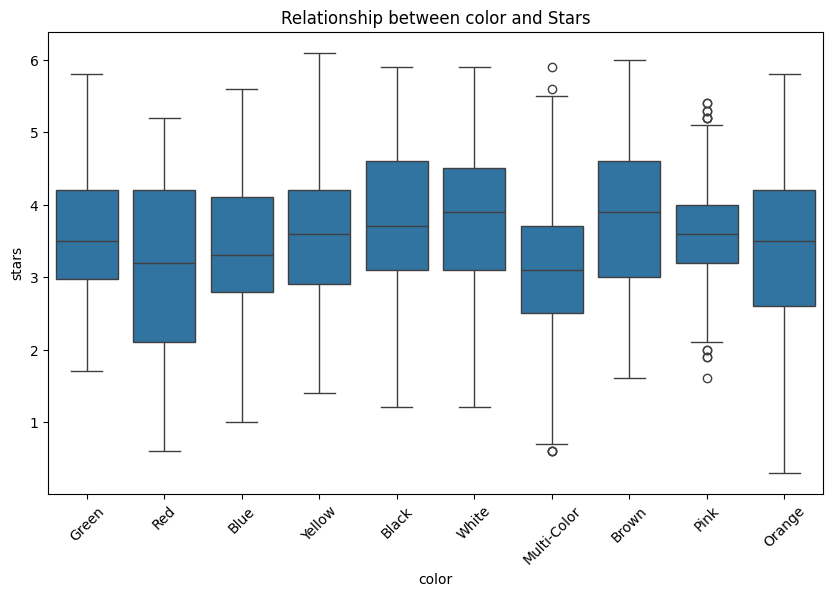

In [78]:
for column in his.select_dtypes(include='object').columns:
    if column != 'success_indicator':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y='stars', data=his)
        plt.title(f'Relationship between {column} and Stars')
        plt.xticks(rotation=45)
        plt.show()


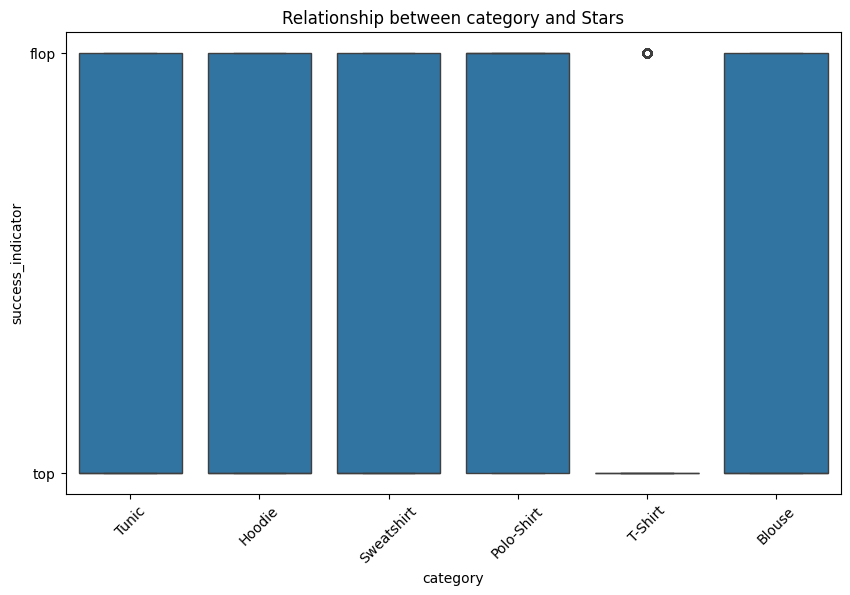

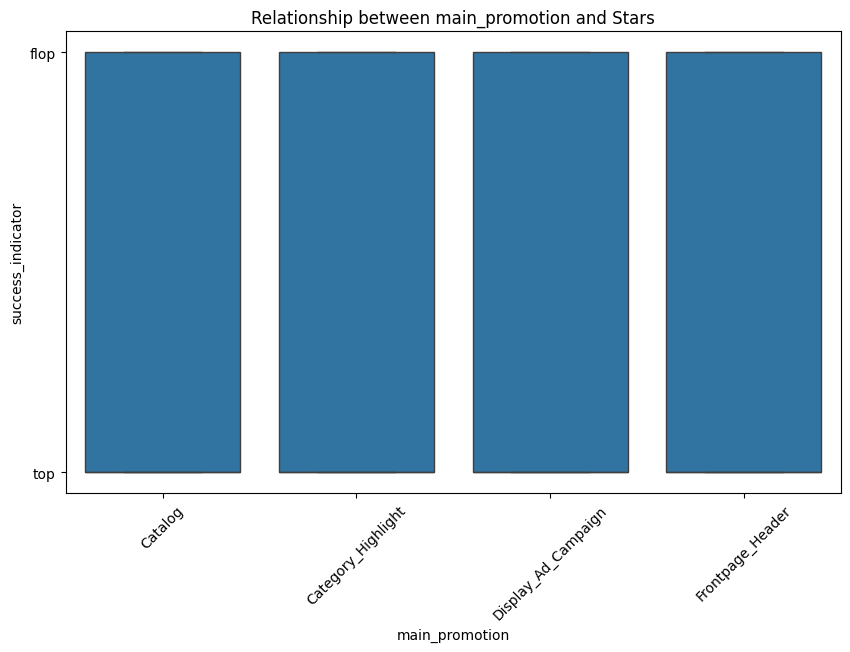

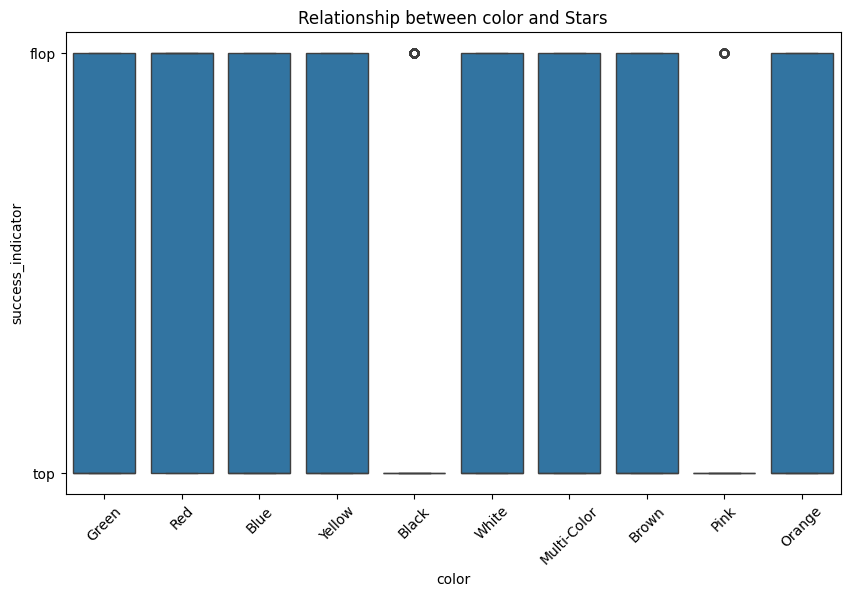

In [79]:
for column in his.select_dtypes(include='object').columns:
    if column != 'success_indicator':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y='success_indicator', data=his)
        plt.title(f'Relationship between {column} and Stars')
        plt.xticks(rotation=45)
        plt.show()

Here based on all of this we can say that

1. very less black and pink items are flop.
2. the amount of t-shirt that are flop is also very low

In [80]:
his.columns

Index(['item_no', 'category', 'main_promotion', 'color', 'stars',
       'success_indicator'],
      dtype='object')

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [82]:
numeric_features = ['stars']
categorical_features = ['category', 'main_promotion', 'color']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

X = his.drop('success_indicator', axis=1)
y = his['success_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.81875
              precision    recall  f1-score   support

        flop       0.78      0.69      0.73       571
         top       0.84      0.89      0.86      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.82      0.82      0.82      1600



In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


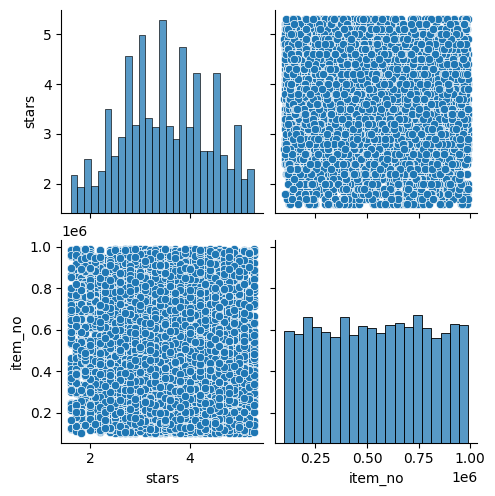

In [88]:
df = his.copy()
if 'success_indicator' in df.columns:
    from sklearn.ensemble import IsolationForest
    outlier_detector = IsolationForest(contamination=0.05)
    outlier_mask = outlier_detector.fit_predict(df[['stars']])
    df = df[outlier_mask == 1]

    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = ['category', 'main_promotion', 'color']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    X = df.drop('success_indicator', axis=1)
    y = df['success_indicator']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    sns.pairplot(df[['stars', 'item_no']])
    plt.show()
else:
    print("'success_indicator' column not found in the dataframe.")

In [89]:
if 'success_indicator' in df.columns:

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_processed, y_train)

    y_pred = clf.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    print(classification_report(y_test, y_pred))
else:
    print("'success_indicator' column not found in the dataframe.")


Accuracy: 0.8141361256544503
              precision    recall  f1-score   support

        flop       0.74      0.65      0.69       494
         top       0.84      0.89      0.87      1034

    accuracy                           0.81      1528
   macro avg       0.79      0.77      0.78      1528
weighted avg       0.81      0.81      0.81      1528



**Note** : WE can find that if we didnot take main_promotion, then our model is performing  0.1 time more with accuracy of arounf 0.824 where with that columns we can get only around 0.8143

In [ ]:
df = his[['category', 'color', 'stars','success_indicator']]

In [ ]:
his['success_indicator'].values_count()

AttributeError: 'Series' object has no attribute 'values_count'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
categorical_cols = ['category', 'color']

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['item_no', 'stars'])
    ])

In [ ]:
clf = RandomForestClassifier()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf)])

In [ ]:
X = df.drop('success_indicator', axis=1)
y = df['success_indicator']

In [ ]:
df

category   color  stars success_indicator
0          Tunic   Green    3.1              flop
1         Hoodie     Red    1.5              flop
2     Sweatshirt     Red    4.4               top
3     Polo-Shirt    Blue    3.1              flop
4         Hoodie   Green    4.1               top
...          ...     ...    ...               ...
7995     T-Shirt    Blue    3.9              flop
7996  Sweatshirt   Green    3.5               top
7997     T-Shirt  Yellow    4.0              flop
7998      Blouse    Blue    2.6              flop
7999  Sweatshirt    Blue    3.9               top

[8000 rows x 4 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def label_encode_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df

his_encoded = label_encode_columns(df)

<ipython-input-55-946553e4a3b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-55-946553e4a3b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-55-946553e4a3b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
his_encoded

category  color  stars  success_indicator
0            5      3    3.1                  0
1            1      7    1.5                  0
2            3      7    4.4                  1
3            2      1    3.1                  0
4            1      3    4.1                  1
...        ...    ...    ...                ...
7995         4      1    3.9                  0
7996         3      3    3.5                  1
7997         4      9    4.0                  0
7998         0      1    2.6                  0
7999         3      1    3.9                  1

[8000 rows x 4 columns]

In [ ]:
# Assuming 'df' is your DataFrame
X = his_encoded.drop('success_indicator', axis=1)  # Features
y = his_encoded['success_indicator']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8225


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier()
}

In [ ]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    print("*" * 100)


RandomForest:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       571
           1       0.83      0.90      0.86      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.82      0.82      0.82      1600

****************************************************************************************************

GradientBoosting:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       571
           1       0.83      0.91      0.87      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.82      0.82      0.81      1600

****************************************************************************************************

KNeighbors:
              precision    recall  f1-score   support

           0       0.81      0.67      0.7

1. RandomForest and GradientBoosting have similar performance with slightly varying precision and recall scores. They both perform above average with an accuracy of 0.82, indicating a good balance between precision and recall.

2. KNeighbors performs slightly better than the others, with an accuracy of 0.83, which suggests it may generalize better to unseen data.
SVM has a slightly lower accuracy of 0.81 compared to KNeighbors, indicating it might struggle with certain classes.

3. LogisticRegression has the lowest accuracy of 0.79, suggesting it may not perform as well as the other models in this task.
DecisionTree performs comparably to RandomForest and GradientBoosting, with an accuracy of 0.81.

In summary, KNeighbors appears to be the best performing model among those tested, followed closely by RandomForest and GradientBoosting. LogisticRegression and DecisionTree show less consistent performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

rf_params = {
    'n_estimators': [100 , 200 ],
    'max_depth': [None,  10,  20],
    'min_samples_split': [2,  5,  10],
    'min_samples_leaf': [1,  2,  4]
}


knn_params = {
    'n_neighbors': list(range(1,  31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


gb_params = {
    'n_estimators': [100,  200],
    'learning_rate': [0.01,  0.1],
    'max_depth': [3,  4,  5],
    'subsample': [0.5,  0.7,  1.0]
}


ada_params = {
    'base_estimator': [None],
    'n_estimators': [50,  100,  200],
    'learning_rate': [0.01,  0.1,  1]
}


def grid_search_cv(X_train, y_train, params, clf):
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
    grid_result = grid_search.fit(X_train, y_train)
    print("Best parameters: ", grid_result.best_params_)
    print("Best score: ", grid_result.best_score_)

grid_search_cv(X_train, y_train, rf_params, RandomForestClassifier())
grid_search_cv(X_train, y_train, knn_params, KNeighborsClassifier())
grid_search_cv(X_train, y_train, gb_params, GradientBoostingClassifier())
grid_search_cv(X_train, y_train, ada_params, AdaBoostClassifier())


Best parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.8425
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best score:  0.84078125
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Best score:  0.83953125


ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'base_estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.
